In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import cotengra as ctg
import quf
import numpy as np
import torch
import algo_cooling as algo
import itertools
import algo_bp
import gen_loop as lg
import gen_loop_tn as lg_tn

In [2]:
opt = algo.opt_(progbar=True)

In [3]:
import torch
to_backend = algo.backend_torch(device = "cuda", dtype = torch.complex128, requires_grad=False)
to_backend_ = algo.backend_numpy( dtype = "complex128")

opt = algo.opt_(progbar=False)

In [4]:
# Define <peps | peps> as an easy problem for bp convergence:
Lx, Ly, bnd = (6, 6, 3)
peps = qtn.PEPS.rand(Lx=Lx, Ly=Ly, bond_dim=bnd, seed=12, dtype="complex128")
peps.apply_to_arrays(to_backend)
fix = { f"I{i},{j}":(i,j) for i,j in itertools.product(range(peps.Lx), range(peps.Ly)) }



In [5]:
tn = peps.H & peps
norm = tn.contract(all, optimize=opt)
peps /= (norm**0.5)
tn = peps.H & peps
norm = tn.contract(all, optimize=opt)
complex(norm)

(1.0000000000000064-1.1449174941446927e-16j)

In [6]:
peps.add_tag('KET')
pepsH = peps.conj().retag({'KET': 'BRA'})
tn = pepsH & peps


In [7]:
res = algo_bp.run_bp(tn, peps.site_tags, normalize=True, print_=True, opt=opt,
                    progbar=True, tol=1.e-9, max_iterations=800, local_convergence=True,
                    update='parallel', damping=0.00, diis=True)

bp = res["bp"]
tn = res["tn"]
print("bp: zeroth", res["norm"], tn.exponent)


bp runs with the parallel update ~ iter = 800


max|dM|=7.56e-10 nconv: 3/3 : : 40it [00:03, 12.75it/s]   


messages normalized and projects are being cal
tn is being normalized w.r.t bp massages
bp: zeroth tensor(1.0309+1.1120e-16j, device='cuda:0', dtype=torch.complex128) tensor(0.0132-9.7428e-18j, device='cuda:0', dtype=torch.complex128)


In [8]:
#all edges in tn:
edges = [tuple(sorted(i)) for i in bp.edges.keys()]
max_edges = len(edges)
print("number of edges:", max_edges)


number of edges: 60


In [9]:

cor = [(1,1),(2,1)]

res_cor = algo_bp.bp_info_rho(cor)
pass_rho = res_cor

#-----------------------------------------------------------
obs = qu.pauli("Z") & qu.pauli("Z") 
obs_tensor = qtn.Tensor(obs.reshape(2,2,2,2), inds=res_cor["inds_rho"], tags="zz")
obs_tensor.apply_to_arrays(to_backend)

print(res_cor, res_cor["reg_tags"] )
res_cor["fix"] = fix


{'inds_rho': ['k1,1', 'k2,1', 'b1,1', 'b2,1'], 'reg_reindex': {'k1,1': 'b1,1', 'k2,1': 'b2,1'}, 'reg_tags': ['I1,1', 'I2,1'], 'leftinds_rho': ['k1,1', 'k2,1'], 'rightinds_rho': ['b1,1', 'b2,1']} ['I1,1', 'I2,1']


In [10]:

loops = lg.loop_gen_local(bp, circum = 4, tags_cluster=[], print_=True, sites=res_cor["reg_tags"], 
                          tn_flat=peps, 
                          site_tags=peps.site_tags)

print(len(loops))

max: number of edges: 60
25


--------------------------


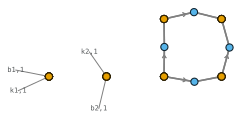

--------------------------
--------------------------


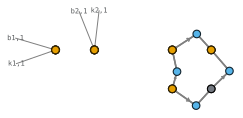

--------------------------
--------------------------


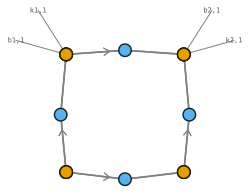

--------------------------
--------------------------


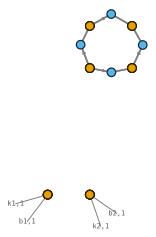

--------------------------
--------------------------


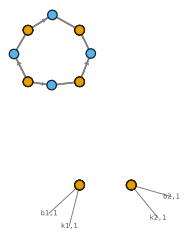

--------------------------
--------------------------


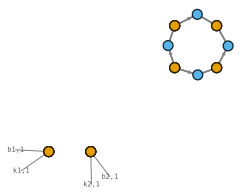

--------------------------
--------------------------


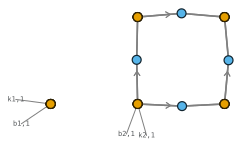

--------------------------
--------------------------


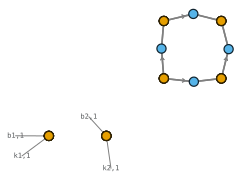

--------------------------
--------------------------


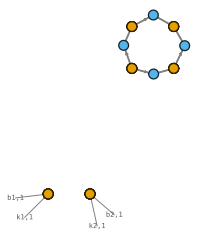

--------------------------
--------------------------


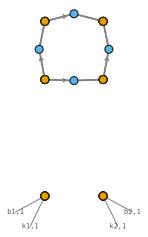

--------------------------
--------------------------


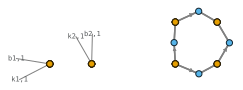

--------------------------
--------------------------


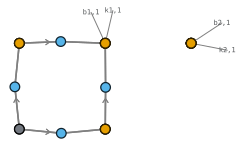

--------------------------
--------------------------


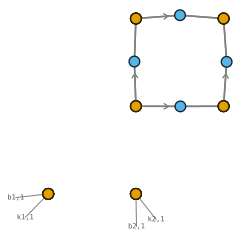

--------------------------
--------------------------


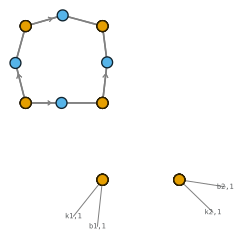

--------------------------
--------------------------


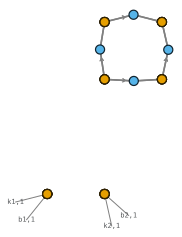

--------------------------
--------------------------


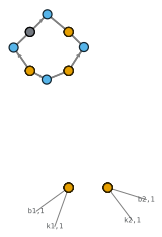

--------------------------
--------------------------


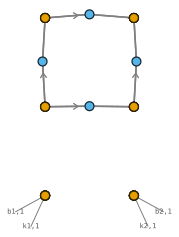

--------------------------
--------------------------


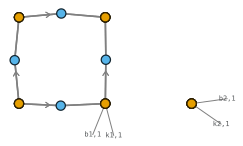

--------------------------
--------------------------


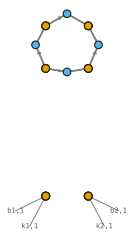

--------------------------
--------------------------


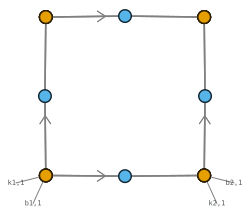

--------------------------
--------------------------


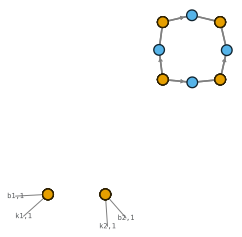

--------------------------
--------------------------


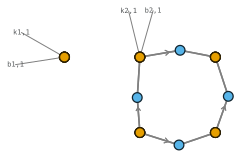

--------------------------
--------------------------


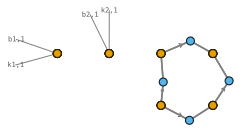

--------------------------
--------------------------


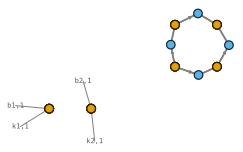

--------------------------
--------------------------


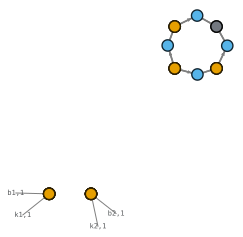

--------------------------


In [11]:
pass_rho |= {"chi":None}
Z, norm_ = lg_tn.rho_bp_excited_loops_(tn, bp, pass_rho, loops, obs_tensor, opt=opt, draw_=True,
                                     pari_exclusive=res_cor["reg_tags"], simplify=False)



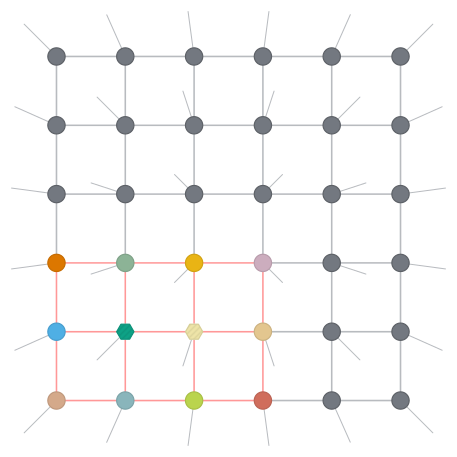

In [12]:
tags_cluster = lg.smart_tag_cluster(peps, res_cor["reg_tags"], max_distance=1, fillin=1, fix=fix, site_tags=peps.site_tags, draw_=True)

In [13]:
loops = lg.loop_gen_local(bp, circum = 4, tags_cluster=tags_cluster, print_=True, sites=res_cor["reg_tags"], 
                          tn_flat=peps, 
                          site_tags=peps.site_tags)

print(len(loops))

max: number of edges: 17
6


--------------------------


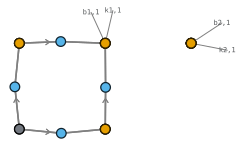

--------------------------
--------------------------


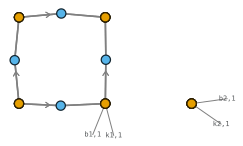

--------------------------
--------------------------


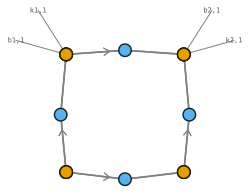

--------------------------
--------------------------


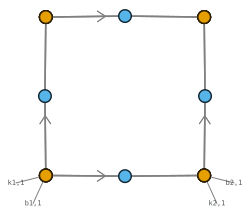

--------------------------
--------------------------


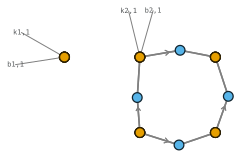

--------------------------
--------------------------


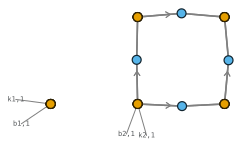

--------------------------


In [14]:
pass_rho |= {"chi":None}
Z, norm_ = lg_tn.rho_bp_excited_loops_(tn, bp, pass_rho, loops, obs_tensor, opt=opt, draw_=True,
                                     pari_exclusive=res_cor["reg_tags"], simplify=False)

